## 作業
在鐵達尼資料集中，今天我們專注觀察變數之間的相關性，以Titanic_train.csv 中，首先將有遺失值的數值刪除，並回答下列問題。
* Q1: 透過數值法計算  Age 和  Survived  是否有相關性?
* Q2:透過數值法計算  Sex 和 Survived  是否有相關性?
* Q3: 透過數值法計算  Age 和  Fare 是否有相關性?   
* 提示:    
1.產稱一個新的變數 Survived_cate ，資料型態傳換成類別型態      
2.把題目中的 Survived 用 Survived_cate 來做分析       
3.首先觀察一下這些變數的資料型態後，再來想要以哪一種判斷倆倆的相關性。     


In [7]:
# import library
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import math
import statistics
import seaborn as sns
from IPython.display import display

!pip install pingouin
import pingouin as pg
import researchpy   
%matplotlib inline

You should consider upgrading via the 'C:\Users\Administrator\anaconda\envs\vnpy_venv\python.exe -m pip install --upgrade pip' command.


  Using cached pingouin-0.5.0-py3-none-any.whl
  Using cached outdated-0.2.1-py3-none-any.whl (7.5 kB)
  Using cached pandas_flavor-0.2.0-py2.py3-none-any.whl (6.6 kB)
  Using cached littleutils-0.2.2-py3-none-any.whl


## 讀入資料

In [2]:
df_train = pd.read_csv("C:/Users/Administrator/Desktop/Python資料科學程式馬拉松/5.專案/Titanic_train.csv")
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
## 這邊我們做一個調整，把 Survived 變成離散型變數 Survived_cate
df_train['Survived_cate'] = df_train['Survived']
df_train['Survived_cate'] = df_train['Survived_cate'].astype('object')
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_cate
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


###  Q1: 透過數值法計算  Age 和  Survived  是否有相關性?


In [8]:
# Age連續 vs Survived_cate離散

# Step1: 取出'Age'和'Survived_cate'資料
aov = pg.anova(dv='Age', between='Survived_cate', data=df_train, detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Survived_cate,897.187582,1,897.187582,4.271195,0.039125,0.005963
1,Within,149559.448362,712,210.055405,NaN,NaN,NaN


In [9]:
# Step1:運用 pg.anova 計算三種變異數
etaSq = aov.SS[0] / (aov.SS[0] + aov.SS[1])
etaSq

0.0059630974469252

In [10]:
print('Age和Survived相關性低')

Age和Survived相關性低


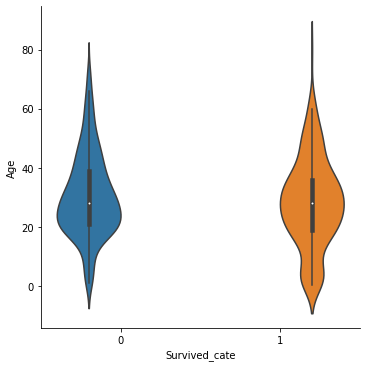

In [23]:
g = sns.catplot(x = 'Survived_cate',y = 'Age',hue = 'Survived_cate'
                ,data = df_train,kind = 'violin')
g

### Q2:透過數值法計算  Sex 和 Survived  是否有相關性?


In [12]:
# Sex離散 VS Survived_cate 離散

# step1: 用交叉列連表(contingency table)，來整理兩個類別型的資料
contTable = pd.crosstab(df_train['Sex'], df_train['Survived_cate'])
contTable

Survived_cate,0,1
Sex,,
female,81,233
male,468,109


In [17]:
# Step2:計算資料自由度 df*
df = min(contTable.shape[0],contTable.shape[1])-1
df

1

In [20]:
# Step3:運用 researchpy 套件，計算出 Cramer’s V 係數
crosstab, res = researchpy.crosstab(df_train['Sex'], df_train['Survived_cate'], test='chi-square')
print(res)

print("Cramer's value is",res.loc[2,'results'])

                Chi-square test   results
0  Pearson Chi-square ( 1.0) =   263.0506
1                    p-value =     0.0000
2               Cramer's phi =     0.5434
Cramer's value is 0.5434


In [22]:
print('Sex 和 Survived 有相關性')

Sex 和 Survived 有相關性


<AxesSubplot:xlabel='Sex', ylabel='count'>

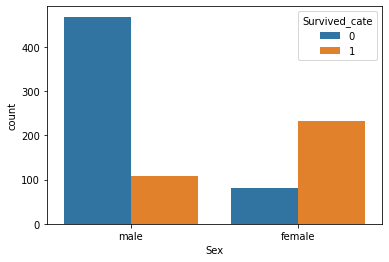

In [25]:
g = sns.countplot(x = 'Sex',hue = 'Survived_cate',data = df_train)
g

### Q3: 透過數值法計算  Age 和  Fare 是否有相關性?  

In [32]:
# Age連續 vs Fare 連續
df_train = df_train[['Age','Fare']].dropna()
df_train

,Age,Fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
885,39.0,29.1250
886,27.0,13.0000
887,19.0,30.0000
889,26.0,30.0000


In [33]:
corr, _= stats.pearsonr(df_train['Age'], df_train['Fare'])
print(corr)

0.09606669176903891


In [35]:
print('Age和 Fare無相關')

Age和 Fare無相關


<AxesSubplot:xlabel='Age', ylabel='Fare'>

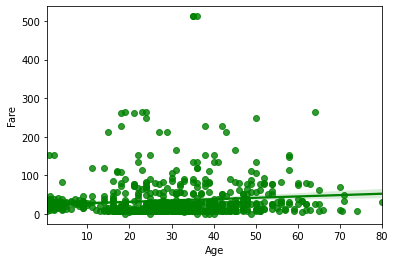

In [34]:
g = sns.regplot(x='Age', y='Fare', color='g', data = df_train)
g 